In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.1 MB/s eta 0:00:00


In [4]:
#Here first we will load the dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML/ Sentiment Analysis on Product Reviews/amazon.csv')
print(df.head(10))

                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
5  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
6  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
7  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
8  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
9  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fir

<ipython-input-4-0f8de295dd67>:4: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ML/ Sentiment Analysis on Product Reviews/amazon.csv')


In [6]:
print(df.columns)

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


In [7]:
#necessaryy columns
df = df[['reviews.text', 'reviews.rating']]
df.dropna(inplace = True)
print(df.head())

                                        reviews.text  reviews.rating
0  This product so far has not disappointed. My c...             5.0
1  great for beginner or experienced person. Boug...             5.0
2  Inexpensive tablet for him to use and learn on...             5.0
3  I've had my Fire HD 8 two weeks now and I love...             4.0
4  I bought this for my grand daughter when she c...             5.0


<ipython-input-7-04cfbd56ce91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [8]:
#For tehe label sentiment
def label_sentiment(rating):
  if rating >= 4:
    return 1
  elif rating <= 2:
    return 0
  else:
    return None

df['sentiment'] = df['reviews.rating'].apply(label_sentiment)
df = df.dropna()
print(df.head())

                                        reviews.text  reviews.rating  \
0  This product so far has not disappointed. My c...             5.0   
1  great for beginner or experienced person. Boug...             5.0   
2  Inexpensive tablet for him to use and learn on...             5.0   
3  I've had my Fire HD 8 two weeks now and I love...             4.0   
4  I bought this for my grand daughter when she c...             5.0   

   sentiment  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  


<ipython-input-8-5646a28f2823>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['reviews.rating'].apply(label_sentiment)


**#Now we w ill perform the EDA (Exploratory data analysis)**

In [12]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.4 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


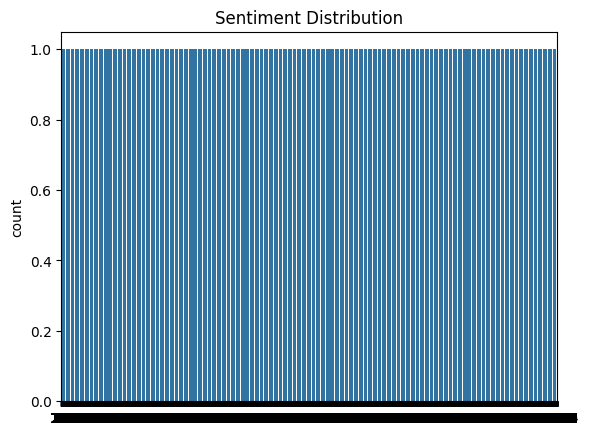

In [14]:
#plot the sentiment distributions
import seaborn as sns

sns.countplot(df['sentiment'])
plt.title('Sentiment Distribution')
plt.show()

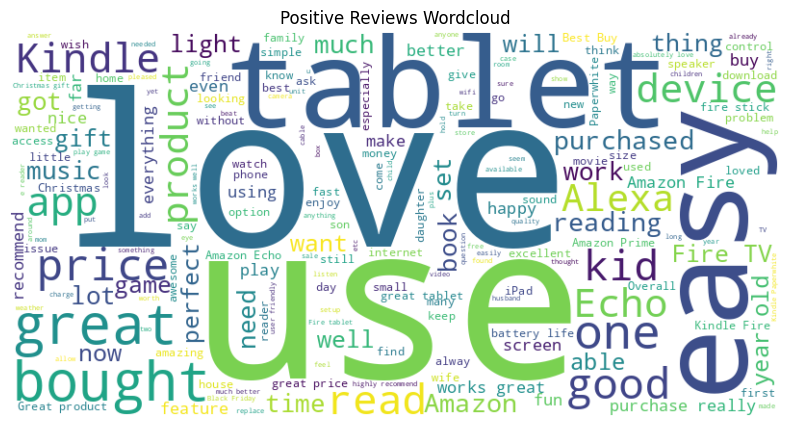

In [15]:
#word cloud for postitive reviews
positive_text = " ".join(df[df['sentiment'] == 1]['reviews.text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Reviews Wordcloud')
plt.show()

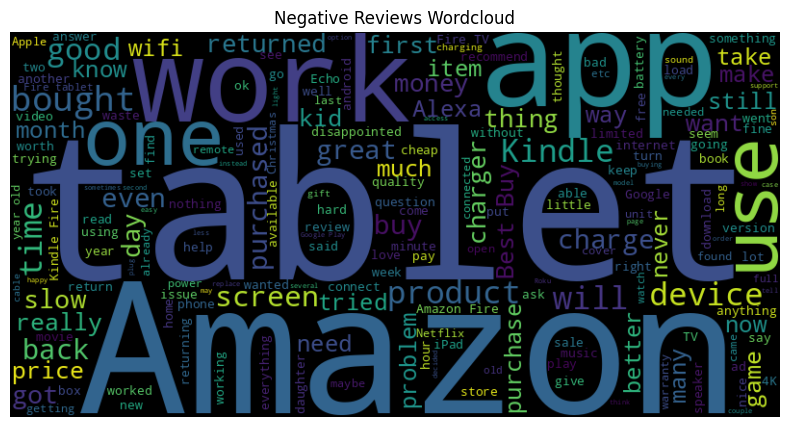

In [16]:
#word cloud for the -ve revoews
negative_text = " ".join(df[df['sentiment'] == 0]['reviews.text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative Reviews Wordcloud')
plt.show()

In [17]:
#Preprocessing

In [18]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

# Apply cleaning
df['cleaned_text'] = df['reviews.text'].apply(clean_text)

df[['reviews.text', 'cleaned_text', 'sentiment']].head()

,reviews.text,cleaned_text,sentiment
0,This product so far has not disappointed. My c...,product far disappointed children love use lik...,1.0
1,great for beginner or experienced person. Boug...,great beginner experienced person bought gift ...,1.0
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrille...,1.0
3,I've had my Fire HD 8 two weeks now and I love...,ive fire hd two weeks love tablet great valuew...,1.0
4,I bought this for my grand daughter when she c...,bought grand daughter comes visit set user ent...,1.0


In [21]:
#Feature Engineering TF IDF Vectorization

In [22]:
X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [24]:
X

,cleaned_text
0,product far disappointed children love use lik...
1,great beginner experienced person bought gift ...
2,inexpensive tablet use learn step nabi thrille...
3,ive fire hd two weeks love tablet great valuew...
4,bought grand daughter comes visit set user ent...
...,...
34654,exactly like usb power charger making unnecess...
34656,amazon include charger kindle fact theyre char...
34657,love kindle fire really disappointed kindle po...
34658,surprised find come type charging cords purcha...


In [25]:
y

,sentiment
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
34654,0.0
34656,0.0
34657,0.0
34658,0.0


In [26]:
#Model building
#Herw we will train the logistic regression
model = LogisticRegression()
model

LogisticRegression()

In [27]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test_tfidf)

In [30]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:
#Acuracy and the classificatopn report
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy is:  0.9772109870208271
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.07      0.14       162
         1.0       0.98      1.00      0.99      6464

    accuracy                           0.98      6626
   macro avg       0.95      0.54      0.56      6626
weighted avg       0.98      0.98      0.97      6626



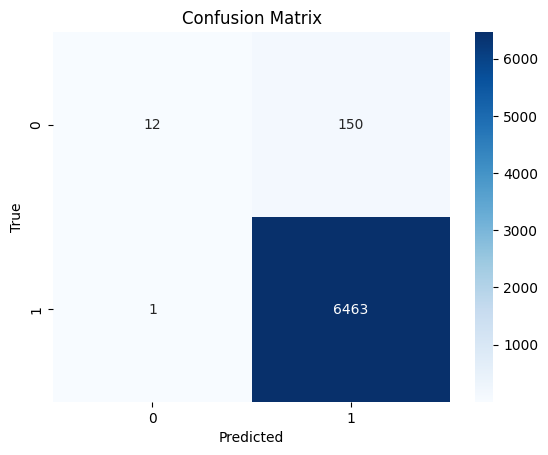

In [32]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
import joblib

# Save model
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [34]:
#Visualizayion

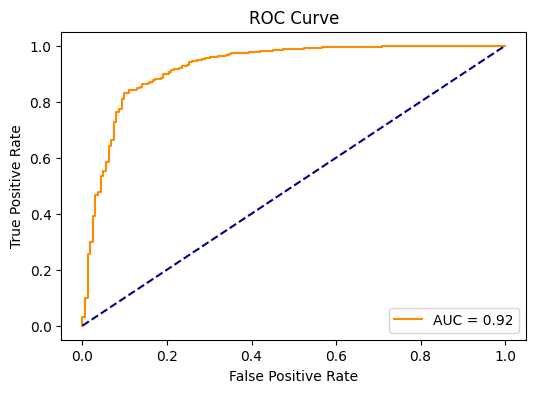

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


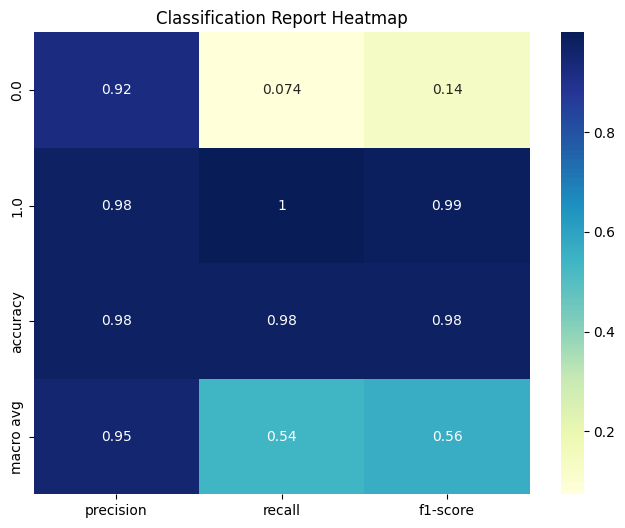

In [36]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()
